# **Predicting Heart Disease Using a Machine Learning Classification Model**
Table of Contents:
1. Problem definition
2. Data Source
3. Hypothesis
4. Features
5. Data Preparation and Analysis
6. Modelling
7. Evaluation

## 1. Problem Definiton
Predicting whether a patient has heart disease or not based on various clinical attributes.

## 2. Data Source
The imported data that was used to train the model on was taken from the Cleveland data at the UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/45/heart+disease  
https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset/data

##3. Hypothesis
The model will be deemed as successful if it produces an accuracy of >85%.


##4. Features

**Data Dictionary:**



1. age: Displays the age of the individual.

2. sex: Displays the gender of the individual using the following format : 1 = male 0 = female

3. cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format : 0 = typical angina 1 = atypical angina 2 = non — anginal pain 3 = asymptotic

4. trestbps- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.

5. chol- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

6. fbs- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes

7. restecg- Resting ECG : displays resting electrocardiographic results 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy

8. thalach- Max heart rate achieved : displays the max heart rate achieved by an individual.

9. exang- Exercise induced angina : 1 = yes 0 = no

10. oldpeak- ST depression induced by exercise relative to rest: displays the value which is an integer or float.

11. slope- Slope of the peak exercise ST segment : 0 = upsloping: better heart rate with excercise (uncommon) 1 = flat: minimal change (typical healthy heart) 2 = downsloping: signs of unhealthy heart

12. ca- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

13. thal : Displays the thalassemia : 1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising

14. target : Displays whether the individual is suffering from heart disease or not : 1 = yes 0 = no


## 5. Data Preparation and Analysis

###5.1: Importing the Libraries

In [ ]:
## Importing all the tools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

import warnings
warnings.filterwarnings('ignore')

###5.2 Importing the Data

In [ ]:
df=pd.read_csv('drive/MyDrive/AI ML Resources/heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df["target"].value_counts()

,count
target,
1,165
0,138


#### Heart disease Count

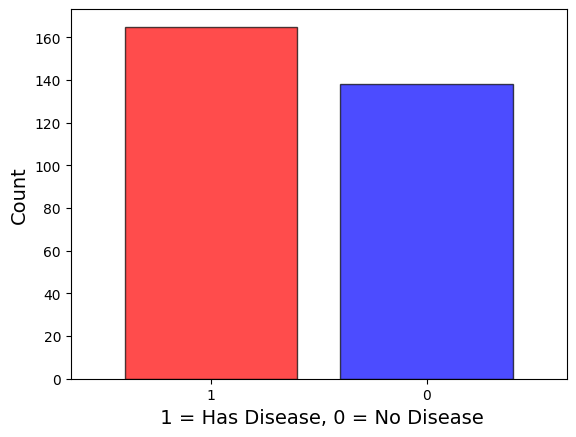

In [ ]:
df["target"].value_counts().plot(
    kind="bar",
    color=["red", "blue"],
    edgecolor='black',
    alpha=0.7,
    width=0.8
)

plt.xlabel(" 1 = Has Disease, 0 = No Disease", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=0)
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Check null values

df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Heart Disease Frequency According to Sex

In [ ]:
df.sex.value_counts()

,count
sex,
1,207
0,96


In [ ]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


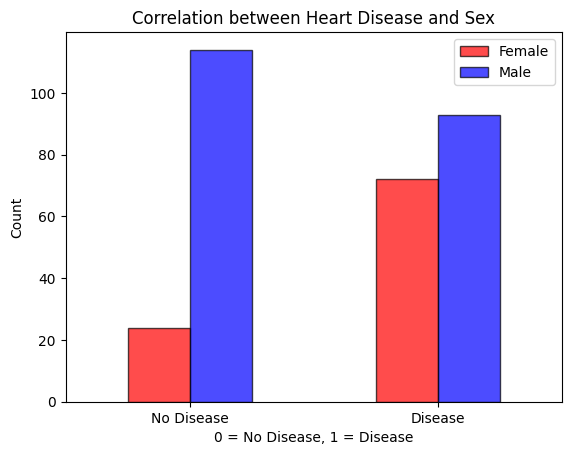

In [ ]:
fig, ax = plt.subplots()

pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    color=["red", "blue"],
                                    edgecolor='black',
                                    alpha=0.7,
                                    ax=ax)
ax.set_xlabel("0 = No Disease, 1 = Disease")
ax.set_ylabel("Count")
ax.set_title("Correlation between Heart Disease and Sex")
ax.legend(["Female", "Male"])
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(["No Disease", "Disease"])
ax.tick_params(axis='x', rotation=0)


plt.show()


#### Correlation Between Age and Thalach (Max Heart Rate) with Heart Disease

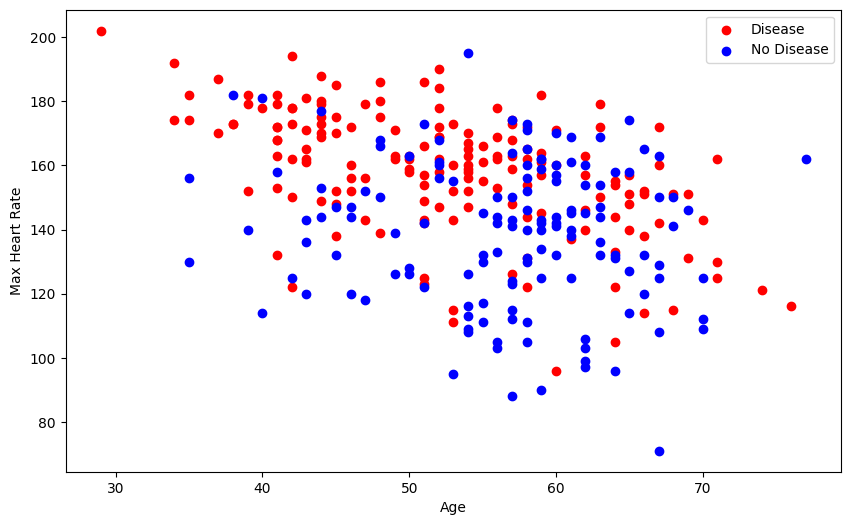

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="red")
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="blue")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

#### Correlation Between Chest Pain Type and Heart Disease

In [ ]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


0 = typical angina  
1 = atypical angina  
2 = non — anginal pain  
3 = asymptotic  

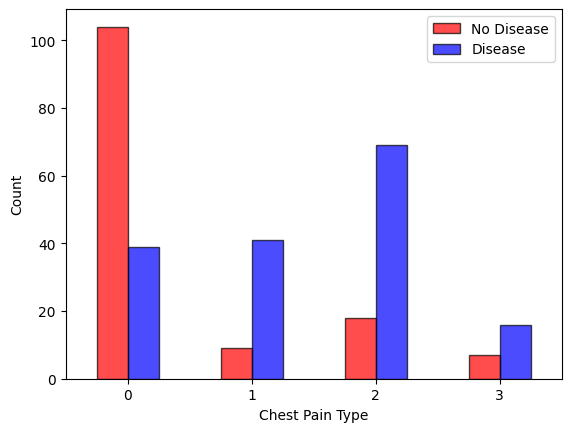

In [ ]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  color=["red","blue"],
                                  edgecolor="black",
                                  alpha=0.7)
plt.xlabel("Chest Pain Type")
plt.legend(["No Disease", "Disease"])
plt.ylabel("Count")
plt.xticks(rotation=0);

In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


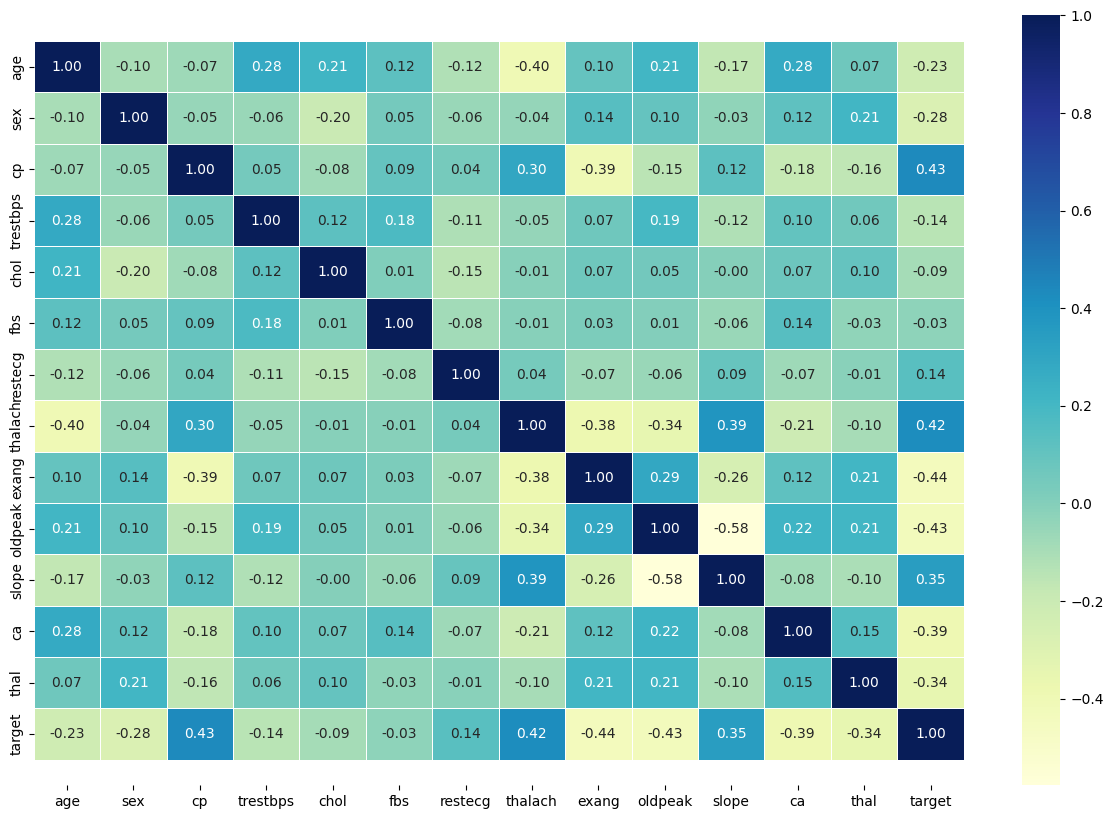

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

Correlation determines whether the relations are positively or inversely proportional, i.e if it's greater than 0 than whenever the first attribute increases so does the other. For example with thalach and target the value is 0.42, which means that the higher the thalach values the more likely the patient has heart disease. Conversely, for chol and target the lower the chol the higher the chance of heart disease to an extent.

## 6. Modelling

In [ ]:
x=df.drop("target",axis=1)
y=df.target
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

This experiment will test on 3 different models:

1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [ ]:
models={"Logistic Regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}
def fit_and_score_models(models,x_train,x_test,y_train,y_test):
  np.random.seed(42)
  model_scores={}
  for name,model in models.items():
    model.fit(x_train,y_train)
    model_scores[name]=model.score(x_test,y_test)
  return model_scores


In [ ]:
model_scores=fit_and_score_models(models,x_train,x_test,y_train,y_test)
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

Logistic Regression is the most accurate, followed by Random Forest and 
then KNN


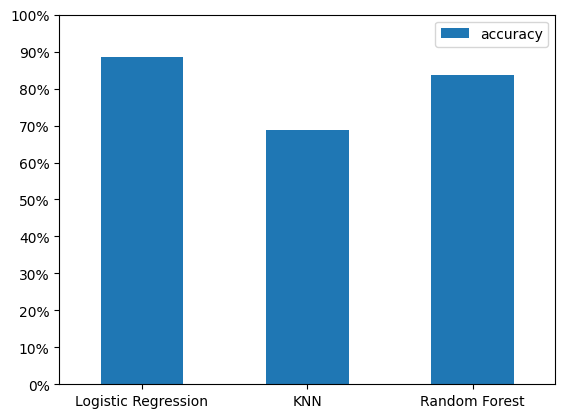

In [ ]:
model_graphs = pd.DataFrame(model_scores, index=["accuracy"])
ax = model_graphs.T.plot.bar()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y * 100)}%'))
ax.set_yticks([i / 100 for i in range(0, 101, 10)])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
print("""Logistic Regression is the most accurate, followed by Random Forest and
then KNN""")
plt.show()

### Attempting to Tune KNN

In [ ]:
test_scores=[]
neighbors=np.arange(1,21)
knn=KNeighborsClassifier()
for i in neighbors:
  knn.set_params(n_neighbors=i)
  knn.fit(x_train,y_train)
  test_scores.append(knn.score(x_test,y_test))
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


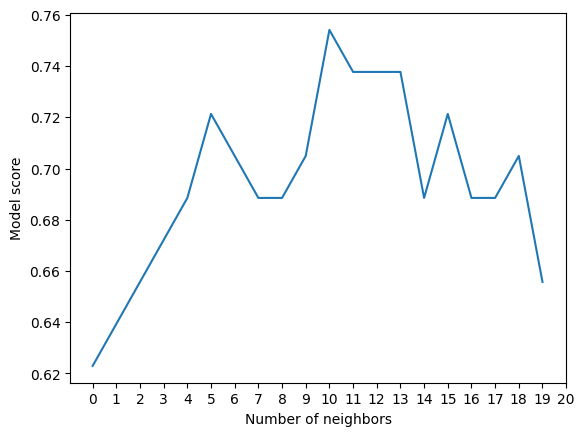

In [ ]:
plt.plot(test_scores)
plt.xticks(np.arange(0, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

K Nearest Neighbors wasn't accurate enough so we will proceed to use the 2 others

### Hyperparameter tuning with RandomizedSearchCV


In [ ]:
# Logistic Regression Hyperparameter Grid
lrGrid={"C": np.logspace(-4, 4, 20),"solver": ["liblinear"]}

# Random Classifier Hyperparameter Grid
rcGrid={"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

np.random.seed(42)

# Apply the grid to the cross validations
rsLr=RandomizedSearchCV(LogisticRegression(),
                                param_distributions=lrGrid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rsRc=RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rcGrid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rsLr.fit(x_train,y_train)
rsRc.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rsLr.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [ ]:
rsRc.best_params_

{'n_estimators': 360,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_depth': 5}

In [ ]:
rsLr.score(x_test,y_test)

0.8852459016393442

In [ ]:
rsRc.score(x_test,y_test)

0.8688524590163934

Not much difference/improvement and we will proceed to use Logistic Regression

### Hyperparameter tuning with GridSearchCV


In [ ]:
lrGrid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

gsLr = GridSearchCV(LogisticRegression(),
                          param_grid=lrGrid,
                          cv=5,
                          verbose=True)

gsLr.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
gsLr.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
gsLr.score(x_test, y_test)

0.8852459016393442

In [ ]:
## Evaluating the Model

## 7. Evaluating the Model

Evaluation Metrics:

*   ROC curve and AUC score
*   Confusion matrix
* Classification report
* Precision
* Recall
* F1-Score

In [1]:
yPred=gsLr.predict(x_test)
yPred

NameError: name 'gsLr' is not defined

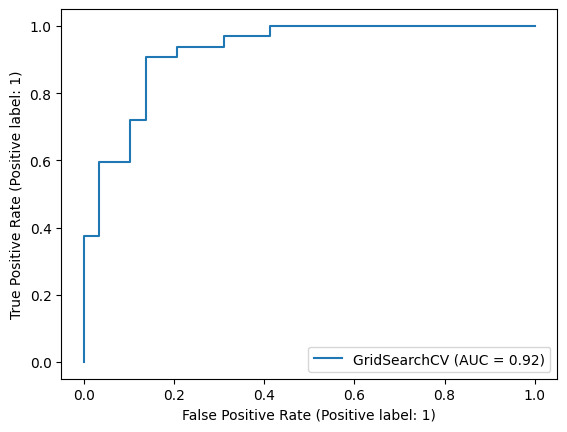

In [ ]:
RocCurveDisplay.from_estimator(gsLr, x_test, y_test)
plt.show()
# Roc Curve is the plot of the true positive rate against the false positive rate

In [ ]:
print(confusion_matrix(y_test, yPred))

[[25  4]
 [ 3 29]]


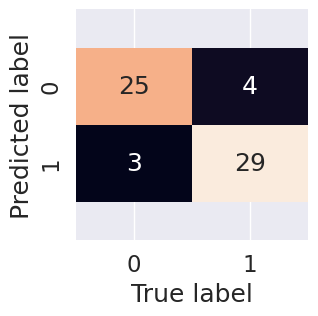

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(y_test, yPred)

In [ ]:
print(classification_report(y_test, yPred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [ ]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [ ]:
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [ ]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [ ]:
cv_precision = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [ ]:
cv_recall = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [ ]:
cv_f1 = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

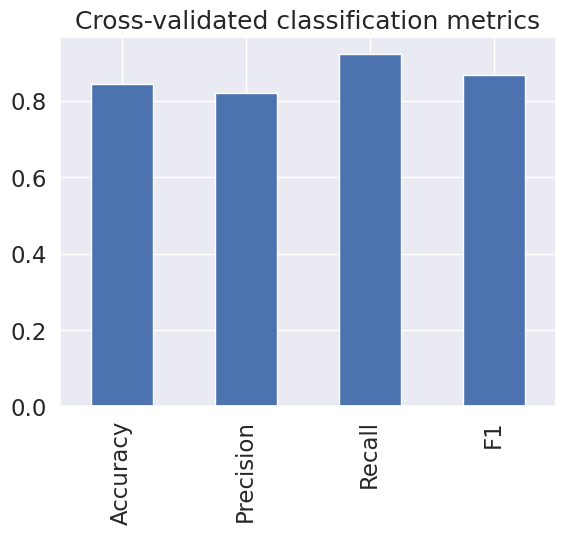

In [ ]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

## Feature Importance

In [ ]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(x_train, y_train);

In [ ]:
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

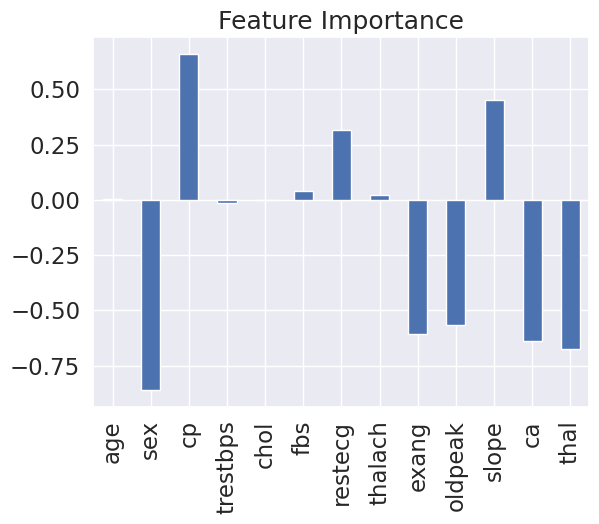

In [ ]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

## End